Important packages to be installed

In [1]:
from jax.example_libraries.optimizers import optimizer
!pip install tensorflow==2.17.0 opencv-python mediapipe scikit-learn matplotlib

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.4-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from numpy.ma.core import concatenate
from setuptools.dist import sequence

Keypoints using MP holistic

In [2]:
mp_holistic = mp.solutions.holistic           #Holistic model
mp_drawing = mp.solutions.drawing_utils        #Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)         #color conversion
    image.flags.writeable = False              #image is no longer writeable
    results = model.process(image)             #make prediction
    image.flags.writeable = True               #making image writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)             #color conversion
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)        #face connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)         #pose connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)      #hand cconnection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)          #hand connection

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))     #face connection
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))         #pose connection
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))      #hand cconnection
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))          #hand connection

In [6]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read feed
        ret,frame = cap.read()
        #make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #draw landmarks
        draw_styled_landmarks(image, results)
        #display result
        cv2.imshow("OpenCV feed", image)
    
        #break loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\Amartya\OneDrive\Sign-Language to Voice translator\Sign-Language-to-voice-translator\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.pose_landmarks.landmark)

33

In [8]:
frame

array([[[151, 147, 128],
        [150, 148, 128],
        [150, 148, 128],
        ...,
        [124, 132, 111],
        [129, 137, 110],
        [133, 141, 111]],

       [[153, 149, 130],
        [152, 150, 130],
        [152, 150, 130],
        ...,
        [122, 131, 110],
        [126, 135, 109],
        [129, 139, 110]],

       [[153, 149, 130],
        [152, 150, 130],
        [153, 151, 131],
        ...,
        [119, 130, 110],
        [122, 134, 109],
        [125, 136, 109]],

       ...,

       [[ 33,  46,  37],
        [ 31,  44,  35],
        [ 27,  40,  32],
        ...,
        [117, 137,  95],
        [116, 136,  94],
        [115, 135,  93]],

       [[ 27,  40,  31],
        [ 26,  39,  31],
        [ 25,  36,  29],
        ...,
        [119, 138,  95],
        [118, 137,  94],
        [117, 136,  93]],

       [[ 24,  37,  29],
        [ 24,  36,  28],
        [ 23,  34,  28],
        ...,
        [119, 138,  95],
        [118, 137,  94],
        [118, 137,  94]]

In [9]:
draw_landmarks(frame,results)

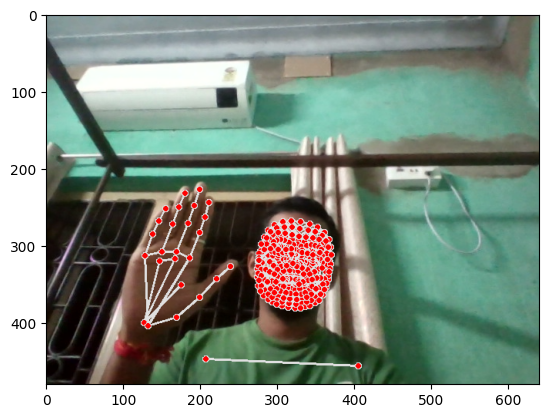

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
len(results.pose_landmarks.landmark)

33

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
pose

array([ 5.00049472e-01,  6.73248291e-01, -7.48905778e-01,  9.99976516e-01,
        5.19763768e-01,  6.44679904e-01, -6.83598638e-01,  9.99943018e-01,
        5.30564904e-01,  6.47861838e-01, -6.83519900e-01,  9.99938250e-01,
        5.41669250e-01,  6.51521325e-01, -6.83489501e-01,  9.99928534e-01,
        4.85985935e-01,  6.36971354e-01, -6.76497579e-01,  9.99943733e-01,
        4.70710337e-01,  6.35633111e-01, -6.75834060e-01,  9.99948800e-01,
        4.55700010e-01,  6.35414004e-01, -6.75854802e-01,  9.99948025e-01,
        5.59933186e-01,  6.85969889e-01, -3.52484852e-01,  9.99913990e-01,
        4.32434231e-01,  6.65996313e-01, -2.91935325e-01,  9.99954700e-01,
        5.13470531e-01,  7.29923785e-01, -6.38394475e-01,  9.99953508e-01,
        4.66750711e-01,  7.23251343e-01, -6.24662638e-01,  9.99960124e-01,
        6.32843852e-01,  9.50222850e-01, -2.22792029e-01,  9.94265556e-01,
        3.24440807e-01,  9.33180451e-01, -2.27424070e-01,  9.98646677e-01,
        7.42671549e-01,  

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.50004947,  0.67324829, -0.74890578, ...,  0.24282658,
        0.5253163 , -0.02719211])

Setup Folder for Collection

In [19]:
DATA_PATH = os.path.join('MP_Data')
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
actions = np.array(['Hello', 'Thanks', 'I Love U'])
no_sequences = 30           #thirthy videos
sequence_length = 30        #thirty frames

In [20]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            # Create the directory for each sequence
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)), exist_ok=True)
        except Exception as e:
            print(f"Failed to create directory for {action} sequence {sequence}: {e}")

Collect keypoints for training and testing

In [21]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                 #read feed
                ret,frame = cap.read()
                #make detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        
                #draw landmarks
                draw_styled_landmarks(image, results)
                
                #collection logic 
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow("OpenCV feed", image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                #display result
                    cv2.imshow("OpenCV feed", image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
    
                #break loop
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Preprocessing of data

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'Hello': 0, 'Thanks': 1, 'I Love U': 2}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [53]:
np.array(sequences).shape

(90, 30, 1662)

In [54]:
np.array(labels).shape

(90,)

In [55]:
X = np.array(sequences)

In [56]:
X.shape

(90, 30, 1662)

In [57]:
y = to_categorical(labels).astype(int)

In [58]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [60]:
y_train.shape

(85, 3)

Build and Train LSTM neural network

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [62]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [63]:
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662)))
model.add(Dropout(0.5))  # Adding dropout
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # L2 regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


C:\Users\Amartya\OneDrive\Sign-Language to Voice translator\Sign-Language-to-voice-translator\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
actions.shape[0]

3

In [65]:
res = [0.7,0.2,0.1]

In [66]:
actions[np.argmax(res)]

'Hello'

In [68]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [71]:
model.fit(X_train, y_train, 
          epochs=2000, 
          validation_split=0.2,  # Reduce validation split
          callbacks=[tb_callback, early_stopping])


Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 1.0000 - loss: 0.0619 - val_accuracy: 1.0000 - val_loss: 0.0617
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9926 - loss: 0.0917 - val_accuracy: 1.0000 - val_loss: 0.0616
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0626 - val_accuracy: 0.6471 - val_loss: 3.8693
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7677 - loss: 2.1929 - val_accuracy: 1.0000 - val_loss: 0.0615
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9697 - loss: 0.0937 - val_accuracy: 1.0000 - val_loss: 0.0761
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8405 - loss: 1.7256 - val_accuracy: 1.0000 - val_loss: 0.0614
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9887 - loss: 0.1120 - val_accuracy: 1.0000 - val_loss: 0.0617
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 0.0681 - val_accuracy: 1.000

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 20, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 20, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

Make predictions

In [73]:
model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


array([[1.0000000e+00, 1.6213402e-12, 2.0897890e-10],
       [1.0000000e+00, 6.3153480e-12, 2.0771758e-10],
       [7.4388371e-14, 1.0000000e+00, 3.2064932e-12],
       [1.5644988e-02, 7.5501921e-03, 9.7680479e-01],
       [9.4400467e-11, 2.1058340e-10, 1.0000000e+00]], dtype=float32)

In [74]:
actions[np.argmax(res[0])]

'Hello'

In [75]:
actions[np.argmax(y_test[0])]

'Hello'

In [76]:
model.save('action.h5')

In [70]:
del model

In [77]:
model.load_weights('action.h5')

Evaluation using confusion Matrix and Accuracy

In [78]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [79]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step 


In [80]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [81]:
yhat

[2,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 2]

In [82]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[58,  0],
        [ 1, 26]],

       [[56,  0],
        [ 0, 29]],

       [[55,  1],
        [ 0, 29]]], dtype=int64)

In [83]:
accuracy_score(ytrue, yhat)

0.9882352941176471

Test in real time

In [84]:
from scipy import stats

In [85]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

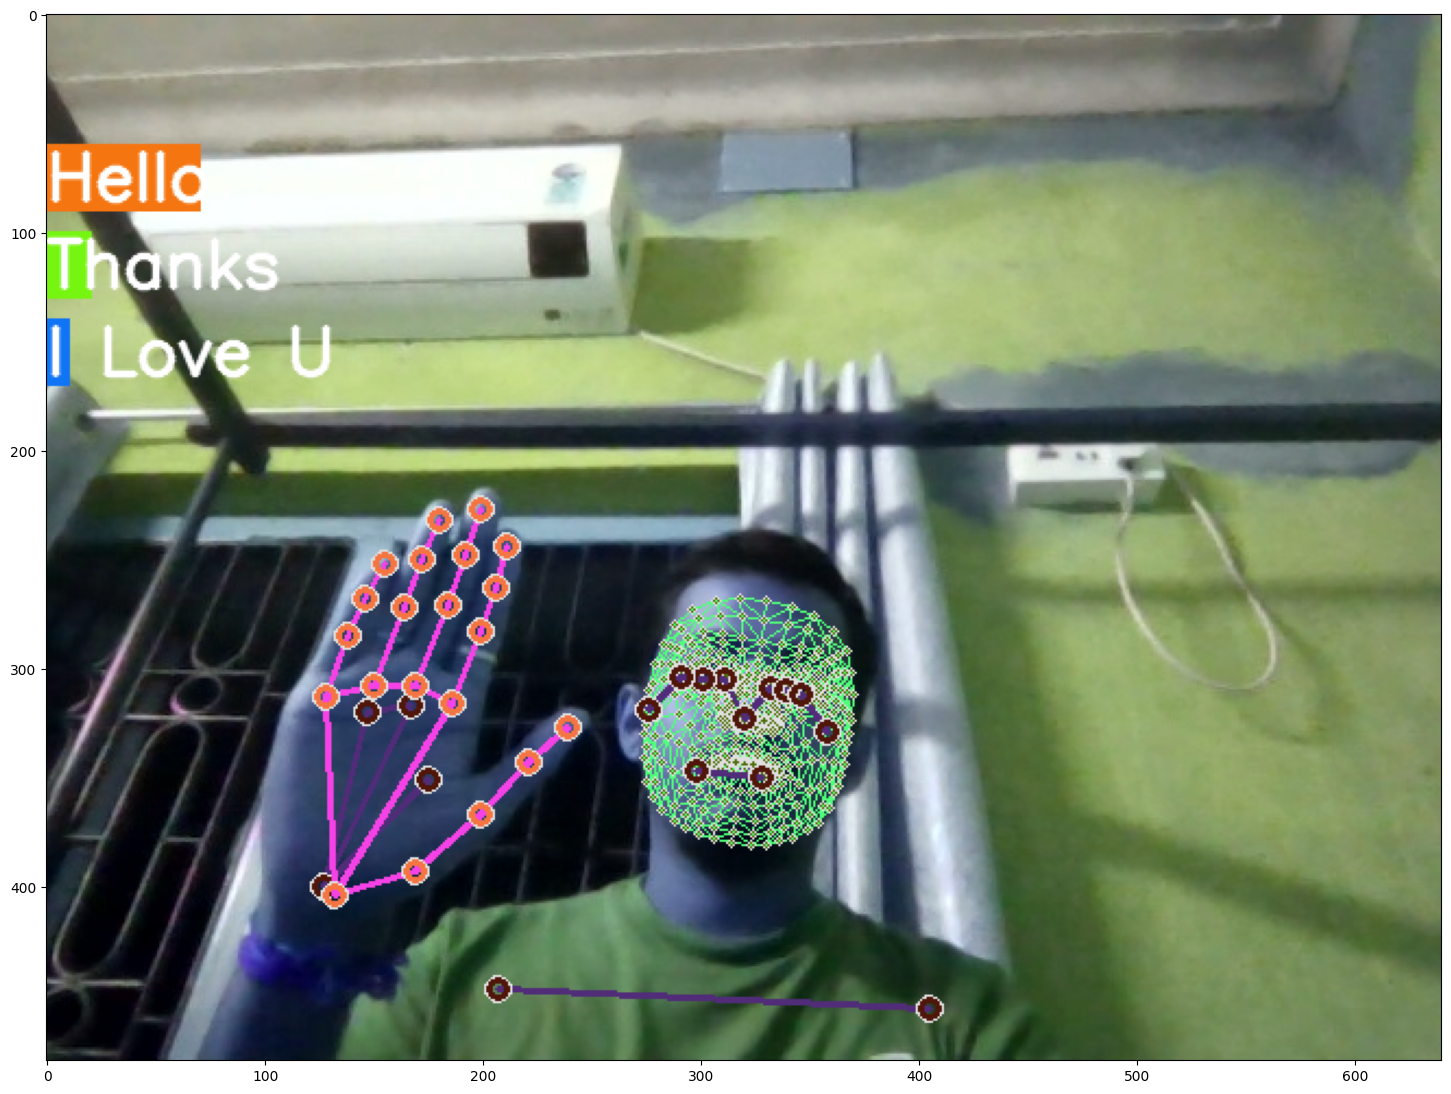

In [86]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [88]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            #if np.unique(predictions[-10:])[0]==np.argmax(res): 
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\Amartya\OneDrive\Sign-Language to Voice translator\Sign-Language-to-voice-translator\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [89]:
cap.release()
cv2.destroyAllWindows()

In [90]:
res[np.argmax(res)] > threshold

True